In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
import scipy
import statsmodels.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
path = "../../data/"

In [16]:
df = pd.read_csv(path + "housing2019.csv", encoding='latin-1')

/Users/calvintirrell/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# df_parcels.head()

In [7]:
# df_parcels.info()

In [8]:
# df_parcels.describe()

In [24]:
# df_ResBldg = pd.read_csv(path + "EXTR_ResBldg.csv")

In [17]:
# df_ResBldg.head()

In [18]:
# df_ResBldg.info()

In [19]:
# df_ResBldg.describe()

In [20]:
# df_RPSale = pd.read_csv(path + "EXTR_RPSale.csv")

In [21]:
# df_RPSale.head()

In [22]:
# df_RPSale.info()

In [23]:
# df_RPSale.describe()

In [26]:
# def common_columns(a,b):
#     """input panda dataframes and returs list of columns they have in common"""
#     a_set = set(a.columns)
#     b_set = set(b.columns)
#     if (a_set & b_set):
#         print(a_set, b_set)
#     else:
#         print('nothing in common')

In [27]:
# all_dfs = [df_RPSale, df_ResBldg, df_parcels]
# for df in all_dfs:
#     df['Major'] = df['Major'].astype('str').str.zfill(6)
#     df['Minor'] = df['Minor'].astype('str').str.zfill(4)
# for df in all_dfs:
#     df['Major_Minor'] = df['Major'] + df['Minor']

In [39]:
# df[df['pin']>0].head()
# df.drop(labels='Unnamed: 0', axis=1, inplace=True)
df.head()

,Major_x,Minor_x,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,8700,215,1,1,17029 106TH AVE SE 98055,17029,,,106TH,AVE,...,N,N,N,N,N,N,N,N,N,N
1,8800,177,1,1,11317 SE 162ND ST,11317,,SE,162ND,ST,...,N,N,N,N,N,N,N,N,N,N
2,8800,226,1,1,11442 SE 164TH ST,11442,,SE,164TH,ST,...,N,N,N,N,N,N,N,N,N,N
3,8400,171,1,1,12926 4TH AVE SW 98146,12926,,,4TH,AVE,...,N,N,N,N,N,N,N,N,N,N
4,9800,940,1,1,27715 SE 24TH WAY 98075,27715,,SE,24TH,WAY,...,N,N,N,N,N,N,N,N,N,N


In [18]:
# combined_df = pd.merge(df_parcels, df_RPSale, on='Major_Minor')

In [19]:
# combined_df = pd.merge(combined_df, df_ResBldg, on='Major_Minor')

In [40]:
# combined_df.head()

In [41]:
# combined_df['SqFtTotLiving'][0] == combined_df['SqFt1stFloor'][0] + combined_df['SqFtHalfFloor'][0] + combined_df['SqFt2ndFloor'][0] + combined_df['SqFtUpperFloor'][0]

In [42]:
# combined_df['LivableSpace'] = combined_df['SqFtTotLiving'] + combined_df['SqFtFinBasement'] + combined_df['SqFtDeck']

In [43]:
# groomed_df = combined_df[['Major_Minor','SalePrice',
#              'LivableSpace', 'SqFtOpenPorch', 'SqFtTotLiving',
#              'SqFtEnclosedPorch', 'SqFtDeck', 'TidelandShoreland',
#              'TrafficNoise', 'AirportNoise', 'PowerLines', 'DocumentDate']]

In [44]:
# combined_df.info()
# combined_filtered = combined_df[(combined_df['SalePrice'] > 10) & (combined_df['SalePrice'] < 5000000) & (combined_df['SqFtTotLiving'] < 50000)]
# combined_2019_filtered = combined_filtered[combined_filtered['DocumentDate'].str.contains('2019')]
# combined_2019_filtered.info()
# groomed_df.head()
# groomed_df.shape
# groomed_df.info()
# groomed_df.drop(axis=1, labels='DocumentDate', inplace=True)

In [45]:
# groomed_df_above_zero = groomed_df[(groomed_df['SalePrice'] > 10) & (groomed_df['SalePrice'] < 5000000) & (groomed_df['SqFtTotLiving'] < 50000)]
# groomed_df_above_zero.head()
# groomed_df_above_zero.shape
# groomed_df_above_zero.info()
# groomed_df_above_zero.to_excel()

In [46]:
# groomed_2019_above_zero = groomed_df_above_zero[groomed_df_above_zero['DocumentDate'].str.contains('2019')]
# groomed_2019_above_zero.head()

In [48]:
df_filtered = df[(df['SalePrice'] > 10) & (df['SalePrice'] < 5000000) & (df['SqFtTotLiving'] < 50000)]

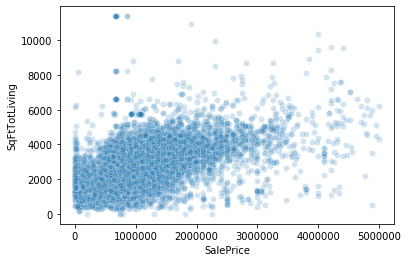

In [50]:
fig, ax = plt.subplots()
ax = sns.scatterplot(data=df_filtered, x='SalePrice', y='SqFtTotLiving', alpha=0.2)

In [132]:
fsm = ols(formula="SalePrice ~ SqFtTotLiving + TidelandShoreland + SqFtOpenPorch + SqFtDeck", data=groomed_df_above_zero).fit()

In [133]:
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                 5.267e+04
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:19:21   Log-Likelihood:            -1.3911e+07
No. Observations:              970137   AIC:                         2.782e+07
Df Residuals:                  970132   BIC:                         2.782e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.411e+04   1014.581     23.767      0.000    2.21e+04    2.61e+04
SqFtTotLiving       177.6369      0.471    377.141      0.000     176.714     178.560
TidelandShoreland  2.783e+05   2418.152    115.105      0.000    2.74e+05    2.83e+05
SqFtOpenPorch       134.3047      3.610     37.201      0.000     127.229     141.381
SqFtDeck            -25.6579      1.299    -19.747      0.000     -28.205     -23.111
==============================================================================
Omnibus:                   845317.069   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         36363989.512
Skew:                           4.070   Prob(JB):                         0.00
Kurtosis:                      31.868   Cond. No.                     1.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.005053739145589
Rainbow p-value: 0.03959145240527391


In [135]:
fsm_2 = ols(formula="SalePrice ~ SqFtTotLiving + TidelandShoreland + SqFtOpenPorch + SqFtDeck", data=groomed_2019_above_zero).fit()

In [136]:
fsm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     4270.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:19:24   Log-Likelihood:            -4.2506e+05
No. Observations:               29621   AIC:                         8.501e+05
Df Residuals:                   29616   BIC:                         8.502e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.265e+05   5817.454     21.737      0.000    1.15e+05    1.38e+05
SqFtTotLiving       282.0029      2.729    103.336      0.000     276.654     287.352
TidelandShoreland   3.77e+05   1.49e+04     25.289      0.000    3.48e+05    4.06e+05
SqFtOpenPorch       177.2993     18.373      9.650      0.000     141.288     213.311
SqFtDeck            195.9824     11.759     16.666      0.000     172.934     219.031
==============================================================================
Omnibus:                    14640.055   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           222241.968
Skew:                           2.006   Prob(JB):                         0.00
Kurtosis:                      15.805   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_2)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0419608450301678
Rainbow p-value: 0.006195276212891833


In [51]:
for _ in df.columns:
    print(_)

Major_x
Minor_x
BldgNbr
NbrLivingUnits
Address
BuildingNumber
Fraction
DirectionPrefix
StreetName
StreetType
DirectionSuffix
ZipCode
Stories
BldgGrade
BldgGradeVar
SqFt1stFloor
SqFtHalfFloor
SqFt2ndFloor
SqFtUpperFloor
SqFtUnfinFull
SqFtUnfinHalf
SqFtTotLiving
SqFtTotBasement
SqFtFinBasement
FinBasementGrade
SqFtGarageBasement
SqFtGarageAttached
DaylightBasement
SqFtOpenPorch
SqFtEnclosedPorch
SqFtDeck
HeatSystem
HeatSource
BrickStone
ViewUtilization
Bedrooms
BathHalfCount
Bath3qtrCount
BathFullCount
FpSingleStory
FpMultiStory
FpFreestanding
FpAdditional
YrBuilt
YrRenovated
PcntComplete
Obsolescence
PcntNetCondition
Condition
AddnlCost
pin
ExciseTaxNbr
Major_y
Minor_y
DocumentDate
SalePrice
RecordingNbr
Volume
Page
PlatNbr
PlatType
PlatLot_x
PlatBlock_x
SellerName
BuyerName
PropertyType
PrincipalUse
SaleInstrument
AFForestLand
AFCurrentUseLand
AFNonProfitUse
AFHistoricProperty
SaleReason
PropertyClass
SaleWarning
Major
Minor
PropName
PlatName
PlatLot_y
PlatBlock_y
Range
Township
Sectio

In [61]:
fsm_3 = ols(formula="SalePrice ~ SqFtTotLiving + TidelandShoreland + SqFtOpenPorch + SqFtDeck + Area", data=df_filtered).fit()

In [62]:
fsm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     3568.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:58:10   Log-Likelihood:            -4.2482e+05
No. Observations:               29621   AIC:                         8.497e+05
Df Residuals:                   29615   BIC:                         8.497e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.103e+05   6918.209     30.399      0.000    1.97e+05    2.24e+05
SqFtTotLiving       286.4610      2.715    105.525      0.000     281.140     291.782
TidelandShoreland  3.834e+05   1.48e+04     25.923      0.000    3.54e+05    4.12e+05
SqFtOpenPorch       206.5822     18.274     11.305      0.000     170.765     242.400
SqFtDeck            187.3638     11.671     16.053      0.000     164.487     210.240
Area              -1959.6078     89.174    -21.975      0.000   -2134.392   -1784.824
==============================================================================
Omnibus:                    14553.877   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           224649.045
Skew:                           1.985   Prob(JB):                         0.00
Kurtosis:                      15.894   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_3)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 0.965660547188186
Rainbow p-value: 0.9832461523067235
